In [1]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as imgread
import math

In [2]:
'''
Before you run the next cell, please upload the provided images 
(left.png, right.png) to Google Colab

Instructions:
1. Download the images from the EdStem post announcing the homework
2. Click on the folder icon on the left panel of Google Colab.
 This is in the column immediately below the colab logo on the top left
 of your screen
3. Drag and drop the images into the file structure. You should see them
immediately in file structure upon clicking the folder icon, once 
uploaded
4. Test whether the images are in the filesystem by running the code below
(Yes, they both look near identical)
5. Remember to redo this step every single time you restart your runtime
'''

'\nBefore you run the next cell, please upload the provided images \n(left.png, right.png) to Google Colab\n\nInstructions:\n1. Download the images from the EdStem post announcing the homework\n2. Click on the folder icon on the left panel of Google Colab.\n This is in the column immediately below the colab logo on the top left\n of your screen\n3. Drag and drop the images into the file structure. You should see them\nimmediately in file structure upon clicking the folder icon, once \nuploaded\n4. Test whether the images are in the filesystem by running the code below\n(Yes, they both look near identical)\n5. Remember to redo this step every single time you restart your runtime\n'

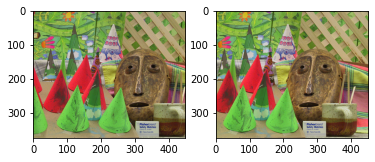

In [3]:
iml = Image.open('left.png')
imr = Image.open('right.png')

fig, ax = plt.subplots(1, 2)
ax[0].imshow(iml)
ax[1].imshow(imr)

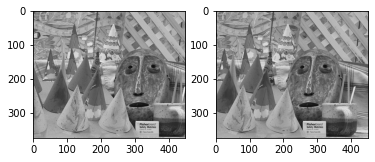

In [4]:
'''
Input: 
image [np.ndarray] np array of shape (h, w, 3) representing an RGB image

Returns: 
grayscale [np.ndarray] np array of shape (h, w) representing a
grayscale equivalent by averaging across the last dimension
'''

def convert_to_grayscale(image):  
    return np.dot(image[...,:3], [0.299, 0.587, 0.114])
  
fig, ax = plt.subplots(1, 2)
imr_mat = np.asarray(Image.open('right.png'))
iml_mat = np.asarray(Image.open('left.png'))
ax[0].imshow(convert_to_grayscale(iml_mat), cmap=plt.get_cmap('gray'))
ax[1].imshow(convert_to_grayscale(imr_mat), cmap=plt.get_cmap('gray'))

In [5]:
'''
Implement Algorithm 1 here

Input:
l [PIL Image]: left image in Pillow format of size (h, w, 3)
r [PIL Image]: right image in Pillow format of size (h, w, 3)

m [(np.ndarray, np.ndarray) -> float]: A higher-order function or lambda
that takes in two np.ndarray and outputs a distance between them. 
    
Examples of 'm' include a function to calculate sum of absolute 
differences (SAD) or sum of squared distances (SSD) given two blocks 

Note: you will have to define different kinds of m functions for this task
and define them accordingly in this notebook

disp [int]: Disparty range, or the furthest distance to test between blocks.
Default should be sufficient for result on given image.
block_size [int]: Size of blocks to be compared: must be odd and must work out 
with the image shape size. Default should be sufficient for result on given
image.

Returns:
d [np.ndarray]: Disparity map according to algorithm 1 
'''
 
def block_matching(l, r, m_dist, disp=50, block_size=7):

    l_gray = convert_to_grayscale(l)
    r_gray = convert_to_grayscale(r)

    d = [ [0.0] *l_gray.shape[1]] * l_gray.shape[0]
    hb = (block_size-1)//2
    h = l_gray.shape[0]
    w = l_gray.shape[1]
    for m in range(h): 
      min_m = max(1, m-hb)
      max_m = min(h, m+hb)
      for n in range(w):
        min_n = max(1, n-hb)
        max_n = min(w, n+hb)
        min_d = max(-disp, 1-min_n)
        max_d = min(disp, w-max_n)
        template = r_gray[min_m:max_m, min_n:max_n]
        num_blocks = max_d - min_d+1
        diff = [[]]*(num_blocks+1)
        for i in (min_d, max_d):
          block = l_gray[min_m:max_m, (min_n+i):(max_n+i)]
          block_idx = i - min_d+1
          diff[block_idx] = m_dist(template, block)
        sorted_idex = np.argsort(diff)
        best_idx = sorted_idex[0]
        best_disparity = min_d+best_idx-1
        d[m][n] = best_disparity
    return d

def calculate_distance(np_a_l,np_a_r):
  return np.linalg.norm(np.subtract(np_a_l, np_a_r), dist_ord)

In [6]:
'''
Function given

Input: d [np.ndarray]: Disparity map output according to algorithm 1
Returns: d_final [np.ndarray]: Normalized disparity map for visualization
'''

def normalize_grayscale(d):

    d_final = np.zeros_like(d)
    a = np.amin(d)
    b = np.amax(d)
    
    for r in range(d.shape[0]):
        for c in range(d.shape[1]):
            d_final[r][c] =  (d[r][c] - a) / (b - a)
            
    return d_final

'''
Function given: visualizes output post normalization
Input: d [np.ndarray]: Disparity map output according to algorithm 1
'''

def final_viz(d):

    d_final = normalize_grayscale(d)
    cm = plt.get_cmap('gray')
    d_im = cm(d_final)
    d_show = Image.fromarray((d_im[:, :, :3] * 255).astype(np.uint8))
    fig, ax = plt.subplots(1, 1)
    ax.imshow(d_show)

C:\Python39\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


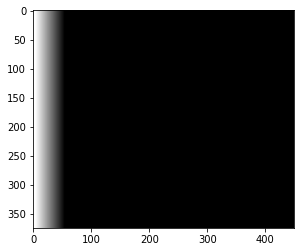

In [7]:
dist_ord = 2
disparity_map = block_matching(iml_mat, imr_mat, calculate_distance)
final_viz(np.asarray(disparity_map, dtype=np.float64))

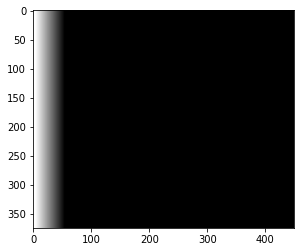

In [8]:
dist_ord = 1
disparity_map = block_matching(iml_mat, imr_mat, calculate_distance)
final_viz(np.asarray(disparity_map, dtype=np.float64))

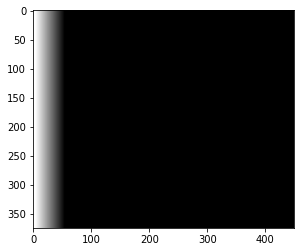

In [9]:
dist_ord = math.inf
disparity_map = block_matching(iml_mat, imr_mat, calculate_distance)
final_viz(np.asarray(disparity_map, dtype=np.float64))